In [1]:
import numpy as np
import pandas as pd
import sys
import os
import os
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data_Entry_2017.csv')
df.head()

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
1                        0.143  0.143          NaN  
2                        0.168  0.168          NaN  
3                        0.171  0.171          NaN  
4                        0.143  0.143          NaN

In [3]:
label_column = 'Finding Labels'
df_simple = df.loc[~df[label_column].str.contains('|', regex=False)]
df_simple.head()

Image Index Finding Labels  Follow-up #  Patient ID  Patient Age  \
0  00000001_000.png   Cardiomegaly            0           1           58   
3  00000002_000.png     No Finding            0           2           81   
4  00000003_000.png         Hernia            0           3           81   
5  00000003_001.png         Hernia            1           3           74   
6  00000003_002.png         Hernia            2           3           75   

  Patient Gender View Position  OriginalImage[Width  Height]  \
0              M            PA                 2682     2749   
3              M            PA                 2500     2048   
4              F            PA                 2582     2991   
5              F            PA                 2500     2048   
6              F            PA                 2048     2500   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN  
3                        0.171  0.171          NaN  
4                        0.143  0.143          NaN  
5                        0.168  0.168          NaN  
6                        0.168  0.168          NaN

In [4]:
labels = [ 'Cardiomegaly', 'Infiltration', 'Nodule',
           'Emphysema', 'Effusion', 'Atelectasis', 'Pleural_Thickening',
           'Pneumothorax', 'Mass', 'Fibrosis', 'Consolidation', 'Edema',
           'Pneumonia']
dataset = df_simple.loc[df[label_column].isin(labels)] 

In [5]:
img_paths = dataset['Image Index'].values
img_labels = dataset[label_column].values

In [6]:
all_data_folder = '../images/'
dataset_folder = '../filtered/'

In [7]:
progress = 0
totals = len(img_paths)

for img_path, label in zip(img_paths, img_labels):
    label_folder = os.path.join(dataset_folder, label)

    if not os.path.exists(label_folder):
        os.makedirs(label_folder)
    copyfile(os.path.join(all_data_folder, img_path), os.path.join(label_folder, img_path))
    
    progress += 1 
    sys.stdout.write("Preparation progress: %d/%d  \r" % (progress,totals) )
    sys.stdout.flush()

## add not finding

In [9]:
# lens_list = []

# for label in os.listdir(dataset_folder):
#     label_folder = os.path.join(dataset_folder, label)
#     images_per_label = len([name for name in os.listdir(label_folder)])
    
#     if label == 'Not finding':
#         continue
#     lens_list.append(images_per_label)
    
# lens_array = np.array(lens_list)
# lens_mean = int(np.mean(lens_array))

# lens_mean

# dataset_no_sample = dataset_no.sample(n=lens_mean)
# dataset_no_sample.to_csv('dataset_no_sample.csv')

In [8]:
label = ['No Finding']
dataset_no = df_simple.loc[df[label_column].isin(label)]

In [9]:
dataset_no_sample = pd.read_csv(os.path.join(dataset_folder, 'dataset_no_sample.csv'))
dataset_no_sample

Unnamed: 0       Image Index Finding Labels  Follow-up #  Patient ID  \
0          83485  00020485_001.png     No Finding            1       20485   
1          43174  00011140_023.png     No Finding           23       11140   
2          28236  00007354_008.png     No Finding            8        7354   
3          40945  00010606_002.png     No Finding            2       10606   
4          30307  00007903_005.png     No Finding            5        7903   
5          95277  00024989_000.png     No Finding            0       24989   
6          14217  00003683_005.png     No Finding            5        3683   
7          51798  00013078_008.png     No Finding            8       13078   
8         105558  00028380_005.png     No Finding            5       28380   
9          34315  00009015_000.png     No Finding            0        9015   
10         72685  00017918_000.png     No Finding            0       17918   
11         22056  00005839_000.png     No Finding            0        5839   
12         47279  00012021_061.png     No Finding           61       12021   
13         52872  00013325_002.png     No Finding            2       13325   
14         34000  00008899_008.png     No Finding            8        8899   
15         17630  00004751_005.png     No Finding            5        4751   
16         11456  00003013_006.png     No Finding            6        3013   
17         39608  00010352_056.png     No Finding           56       10352   
18         31554  00008251_005.png     No Finding            5        8251   
19         60730  00014997_000.png     No Finding            0       14997   
20         17634  00004753_002.png     No Finding            2        4753   
21        106936  00028864_001.png     No Finding            1       28864   
22         79640  00019563_000.png     No Finding            0       19563   
23         74845  00018366_005.png     No Finding            5       18366   
24         70426  00017363_000.png     No Finding            0       17363   
25         21092  00005639_000.png     No Finding            0        5639   
26         90398  00022483_000.png     No Finding            0       22483   
27          8173  00002146_006.png     No Finding            6        2146   
28         61125  00015072_017.png     No Finding           17       15072   
29        104092  00027784_010.png     No Finding           10       27784   
...          ...               ...            ...          ...         ...   
2343       98492  00026027_011.png     No Finding           11       26027   
2344       71403  00017606_006.png     No Finding            6       17606   
2345       61161  00015080_001.png     No Finding            1       15080   
2346       83894  00020624_005.png     No Finding            5       20624   
2347       77275  00018977_000.png     No Finding            0       18977   
2348       30426  00007936_001.png     No Finding            1        7936   
2349       88911  00022051_000.png     No Finding            0       22051   
2350        3059  00000809_000.png     No Finding            0         809   
2351      107530  00029041_016.png     No Finding           16       29041   
2352      102541  00027327_001.png     No Finding            1       27327   
2353       92247  00023052_000.png     No Finding            0       23052   
2354       67938  00016785_000.png     No Finding            0       16785   
2355      107240  00028939_005.png     No Finding            5       28939   
2356       72603  00017897_002.png     No Finding            2       17897   
2357       71180  00017546_005.png     No Finding            5       17546   
2358       52962  00013352_003.png     No Finding            3       13352   
2359       22752  00006013_001.png     No Finding            1        6013   
2360        7864  00002059_000.png     No Finding            0        2059   
2361       94474  00024239_000.png     No Finding            0       24239   
2362       60351  00014903_0

In [10]:
img_paths_no = dataset_no_sample['Image Index'].values
img_labels_no = dataset_no_sample[label_column].values

In [11]:
progress = 0
totals = len(img_paths_no)

for img_path, label in zip(img_paths_no, img_labels_no):
    label_folder = os.path.join(dataset_folder, label)

    if not os.path.exists(label_folder):
        os.makedirs(label_folder)
    copyfile(os.path.join(all_data_folder, img_path), os.path.join(label_folder, img_path))
    
    progress += 1 
    sys.stdout.write("Preparation progress: %d/%d  \r" % (progress,totals) )
    sys.stdout.flush()

## Data distribution

In [12]:
from shutil import move

dest_dir = os.path.join(dataset_folder, 'train')

if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)
    
for label in os.listdir(dataset_folder):
    if label == 'train' or not os.path.isdir(os.path.join(dataset_folder, label)):
        continue
    source_dir = os.path.join(dataset_folder, label)
    move(source_dir, dest_dir)
    print ("Successfully moved the directory %s " % source_dir)

Successfully moved the directory ../filtered/Atelectasis 
Successfully moved the directory ../filtered/Cardiomegaly 
Successfully moved the directory ../filtered/Consolidation 
Successfully moved the directory ../filtered/Edema 
Successfully moved the directory ../filtered/Effusion 
Successfully moved the directory ../filtered/Emphysema 
Successfully moved the directory ../filtered/Fibrosis 
Successfully moved the directory ../filtered/Infiltration 
Successfully moved the directory ../filtered/Mass 
Successfully moved the directory ../filtered/No Finding 
Successfully moved the directory ../filtered/Nodule 
Successfully moved the directory ../filtered/Pleural_Thickening 
Successfully moved the directory ../filtered/Pneumonia 
Successfully moved the directory ../filtered/Pneumothorax 


In [13]:
import random

# Create test folder
all_files_to_copy = []

for folder in os.listdir(os.path.join(dataset_folder, 'train')):    
    train_folder = os.path.join(dataset_folder, 'train', folder)
    test_folder = os.path.join(dataset_folder, 'test', folder)

    # Make the validation directories
    try:
        os.makedirs(test_folder)
    except OSError:
        print ("Creation of the directory %s failed" % folder)
    else:
        print ("Successfully created the directory %s " % folder)

    files = os.listdir(train_folder)
    
    files_to_copy = random.sample(files, int(len(files) * .2))
    
    full_path_list = [os.path.join(train_folder, to_copy) for to_copy in files_to_copy]
    all_files_to_copy += full_path_list

Successfully created the directory Atelectasis 
Successfully created the directory Cardiomegaly 
Successfully created the directory Consolidation 
Successfully created the directory Edema 
Successfully created the directory Effusion 
Successfully created the directory Emphysema 
Successfully created the directory Fibrosis 
Successfully created the directory Infiltration 
Successfully created the directory Mass 
Successfully created the directory No Finding 
Successfully created the directory Nodule 
Successfully created the directory Pleural_Thickening 
Successfully created the directory Pneumonia 
Successfully created the directory Pneumothorax 


In [14]:
files_to_copy_folder = os.path.join(dataset_folder, 'files_to_copy.npy')

if os.path.exists(files_to_copy_folder):
    np_files_to_copy = np.load(files_to_copy_folder)
else:
    np_files_to_copy = np.array(all_files_to_copy)
    np.save(files_to_copy_folder, np_files_to_copy)
        
for to_copy in np_files_to_copy:
    test_folder = to_copy.replace('train', 'test')
    print(to_copy, test_folder)
    move(to_copy, test_folder)

../filtered/train/Atelectasis/00011937_000.png ../filtered/test/Atelectasis/00011937_000.png
../filtered/train/Atelectasis/00000275_002.png ../filtered/test/Atelectasis/00000275_002.png
../filtered/train/Atelectasis/00007317_010.png ../filtered/test/Atelectasis/00007317_010.png
../filtered/train/Atelectasis/00009110_003.png ../filtered/test/Atelectasis/00009110_003.png
../filtered/train/Atelectasis/00013209_003.png ../filtered/test/Atelectasis/00013209_003.png
../filtered/train/Atelectasis/00019694_001.png ../filtered/test/Atelectasis/00019694_001.png
../filtered/train/Atelectasis/00013812_008.png ../filtered/test/Atelectasis/00013812_008.png
../filtered/train/Atelectasis/00011489_000.png ../filtered/test/Atelectasis/00011489_000.png
../filtered/train/Atelectasis/00003002_011.png ../filtered/test/Atelectasis/00003002_011.png
../filtered/train/Atelectasis/00021195_001.png ../filtered/test/Atelectasis/00021195_001.png
../filtered/train/Atelectasis/00022156_004.png ../filtered/test/Atelec

../filtered/train/Atelectasis/00014034_003.png ../filtered/test/Atelectasis/00014034_003.png
../filtered/train/Atelectasis/00016980_009.png ../filtered/test/Atelectasis/00016980_009.png
../filtered/train/Atelectasis/00005381_000.png ../filtered/test/Atelectasis/00005381_000.png
../filtered/train/Atelectasis/00013914_000.png ../filtered/test/Atelectasis/00013914_000.png
../filtered/train/Atelectasis/00002049_001.png ../filtered/test/Atelectasis/00002049_001.png
../filtered/train/Atelectasis/00007806_000.png ../filtered/test/Atelectasis/00007806_000.png
../filtered/train/Atelectasis/00009913_000.png ../filtered/test/Atelectasis/00009913_000.png
../filtered/train/Atelectasis/00027748_007.png ../filtered/test/Atelectasis/00027748_007.png
../filtered/train/Atelectasis/00016716_008.png ../filtered/test/Atelectasis/00016716_008.png
../filtered/train/Atelectasis/00017027_002.png ../filtered/test/Atelectasis/00017027_002.png
../filtered/train/Atelectasis/00007558_017.png ../filtered/test/Atelec

../filtered/train/Atelectasis/00003978_000.png ../filtered/test/Atelectasis/00003978_000.png
../filtered/train/Atelectasis/00030327_000.png ../filtered/test/Atelectasis/00030327_000.png
../filtered/train/Atelectasis/00007558_012.png ../filtered/test/Atelectasis/00007558_012.png
../filtered/train/Atelectasis/00028888_000.png ../filtered/test/Atelectasis/00028888_000.png
../filtered/train/Atelectasis/00030695_001.png ../filtered/test/Atelectasis/00030695_001.png
../filtered/train/Atelectasis/00004746_008.png ../filtered/test/Atelectasis/00004746_008.png
../filtered/train/Atelectasis/00000248_008.png ../filtered/test/Atelectasis/00000248_008.png
../filtered/train/Atelectasis/00029451_002.png ../filtered/test/Atelectasis/00029451_002.png
../filtered/train/Atelectasis/00021024_008.png ../filtered/test/Atelectasis/00021024_008.png
../filtered/train/Atelectasis/00016620_000.png ../filtered/test/Atelectasis/00016620_000.png
../filtered/train/Atelectasis/00009355_001.png ../filtered/test/Atelec

../filtered/train/Atelectasis/00013894_042.png ../filtered/test/Atelectasis/00013894_042.png
../filtered/train/Atelectasis/00009638_015.png ../filtered/test/Atelectasis/00009638_015.png
../filtered/train/Atelectasis/00003123_000.png ../filtered/test/Atelectasis/00003123_000.png
../filtered/train/Atelectasis/00028302_000.png ../filtered/test/Atelectasis/00028302_000.png
../filtered/train/Atelectasis/00003659_001.png ../filtered/test/Atelectasis/00003659_001.png
../filtered/train/Atelectasis/00019271_042.png ../filtered/test/Atelectasis/00019271_042.png
../filtered/train/Atelectasis/00022394_000.png ../filtered/test/Atelectasis/00022394_000.png
../filtered/train/Atelectasis/00018472_010.png ../filtered/test/Atelectasis/00018472_010.png
../filtered/train/Atelectasis/00025640_001.png ../filtered/test/Atelectasis/00025640_001.png
../filtered/train/Atelectasis/00007864_000.png ../filtered/test/Atelectasis/00007864_000.png
../filtered/train/Atelectasis/00007864_001.png ../filtered/test/Atelec

../filtered/train/Atelectasis/00017569_000.png ../filtered/test/Atelectasis/00017569_000.png
../filtered/train/Atelectasis/00009356_004.png ../filtered/test/Atelectasis/00009356_004.png
../filtered/train/Atelectasis/00013844_005.png ../filtered/test/Atelectasis/00013844_005.png
../filtered/train/Atelectasis/00009892_022.png ../filtered/test/Atelectasis/00009892_022.png
../filtered/train/Atelectasis/00005348_019.png ../filtered/test/Atelectasis/00005348_019.png
../filtered/train/Atelectasis/00015653_004.png ../filtered/test/Atelectasis/00015653_004.png
../filtered/train/Atelectasis/00003905_000.png ../filtered/test/Atelectasis/00003905_000.png
../filtered/train/Atelectasis/00015911_009.png ../filtered/test/Atelectasis/00015911_009.png
../filtered/train/Atelectasis/00004188_000.png ../filtered/test/Atelectasis/00004188_000.png
../filtered/train/Atelectasis/00016358_012.png ../filtered/test/Atelectasis/00016358_012.png
../filtered/train/Atelectasis/00025480_003.png ../filtered/test/Atelec

../filtered/train/Atelectasis/00001836_056.png ../filtered/test/Atelectasis/00001836_056.png
../filtered/train/Atelectasis/00010128_001.png ../filtered/test/Atelectasis/00010128_001.png
../filtered/train/Atelectasis/00023173_002.png ../filtered/test/Atelectasis/00023173_002.png
../filtered/train/Atelectasis/00007340_000.png ../filtered/test/Atelectasis/00007340_000.png
../filtered/train/Atelectasis/00010044_001.png ../filtered/test/Atelectasis/00010044_001.png
../filtered/train/Atelectasis/00017736_001.png ../filtered/test/Atelectasis/00017736_001.png
../filtered/train/Atelectasis/00022067_000.png ../filtered/test/Atelectasis/00022067_000.png
../filtered/train/Atelectasis/00012094_067.png ../filtered/test/Atelectasis/00012094_067.png
../filtered/train/Atelectasis/00005761_000.png ../filtered/test/Atelectasis/00005761_000.png
../filtered/train/Atelectasis/00017912_002.png ../filtered/test/Atelectasis/00017912_002.png
../filtered/train/Atelectasis/00020125_005.png ../filtered/test/Atelec

../filtered/train/Atelectasis/00004858_056.png ../filtered/test/Atelectasis/00004858_056.png
../filtered/train/Atelectasis/00029474_000.png ../filtered/test/Atelectasis/00029474_000.png
../filtered/train/Atelectasis/00013781_002.png ../filtered/test/Atelectasis/00013781_002.png
../filtered/train/Atelectasis/00027142_007.png ../filtered/test/Atelectasis/00027142_007.png
../filtered/train/Atelectasis/00026917_001.png ../filtered/test/Atelectasis/00026917_001.png
../filtered/train/Atelectasis/00010270_008.png ../filtered/test/Atelectasis/00010270_008.png
../filtered/train/Atelectasis/00026848_000.png ../filtered/test/Atelectasis/00026848_000.png
../filtered/train/Atelectasis/00001900_000.png ../filtered/test/Atelectasis/00001900_000.png
../filtered/train/Atelectasis/00025588_001.png ../filtered/test/Atelectasis/00025588_001.png
../filtered/train/Atelectasis/00014958_011.png ../filtered/test/Atelectasis/00014958_011.png
../filtered/train/Atelectasis/00004893_065.png ../filtered/test/Atelec

../filtered/train/Atelectasis/00003923_000.png ../filtered/test/Atelectasis/00003923_000.png
../filtered/train/Atelectasis/00005742_005.png ../filtered/test/Atelectasis/00005742_005.png
../filtered/train/Atelectasis/00001900_010.png ../filtered/test/Atelectasis/00001900_010.png
../filtered/train/Atelectasis/00022312_009.png ../filtered/test/Atelectasis/00022312_009.png
../filtered/train/Atelectasis/00004867_000.png ../filtered/test/Atelectasis/00004867_000.png
../filtered/train/Atelectasis/00016267_000.png ../filtered/test/Atelectasis/00016267_000.png
../filtered/train/Atelectasis/00020721_000.png ../filtered/test/Atelectasis/00020721_000.png
../filtered/train/Atelectasis/00020106_000.png ../filtered/test/Atelectasis/00020106_000.png
../filtered/train/Atelectasis/00000877_025.png ../filtered/test/Atelectasis/00000877_025.png
../filtered/train/Atelectasis/00010758_007.png ../filtered/test/Atelectasis/00010758_007.png
../filtered/train/Atelectasis/00006996_008.png ../filtered/test/Atelec

../filtered/train/Cardiomegaly/00023246_000.png ../filtered/test/Cardiomegaly/00023246_000.png
../filtered/train/Cardiomegaly/00002059_002.png ../filtered/test/Cardiomegaly/00002059_002.png
../filtered/train/Cardiomegaly/00028873_004.png ../filtered/test/Cardiomegaly/00028873_004.png
../filtered/train/Cardiomegaly/00012565_000.png ../filtered/test/Cardiomegaly/00012565_000.png
../filtered/train/Cardiomegaly/00000069_000.png ../filtered/test/Cardiomegaly/00000069_000.png
../filtered/train/Cardiomegaly/00005425_000.png ../filtered/test/Cardiomegaly/00005425_000.png
../filtered/train/Cardiomegaly/00009156_000.png ../filtered/test/Cardiomegaly/00009156_000.png
../filtered/train/Cardiomegaly/00000032_053.png ../filtered/test/Cardiomegaly/00000032_053.png
../filtered/train/Cardiomegaly/00016001_000.png ../filtered/test/Cardiomegaly/00016001_000.png
../filtered/train/Cardiomegaly/00010808_000.png ../filtered/test/Cardiomegaly/00010808_000.png
../filtered/train/Cardiomegaly/00022741_000.png ..

../filtered/train/Cardiomegaly/00004630_002.png ../filtered/test/Cardiomegaly/00004630_002.png
../filtered/train/Cardiomegaly/00000442_003.png ../filtered/test/Cardiomegaly/00000442_003.png
../filtered/train/Cardiomegaly/00021565_023.png ../filtered/test/Cardiomegaly/00021565_023.png
../filtered/train/Cardiomegaly/00021107_002.png ../filtered/test/Cardiomegaly/00021107_002.png
../filtered/train/Cardiomegaly/00006339_002.png ../filtered/test/Cardiomegaly/00006339_002.png
../filtered/train/Cardiomegaly/00001373_022.png ../filtered/test/Cardiomegaly/00001373_022.png
../filtered/train/Cardiomegaly/00006808_003.png ../filtered/test/Cardiomegaly/00006808_003.png
../filtered/train/Cardiomegaly/00023452_000.png ../filtered/test/Cardiomegaly/00023452_000.png
../filtered/train/Cardiomegaly/00007094_000.png ../filtered/test/Cardiomegaly/00007094_000.png
../filtered/train/Cardiomegaly/00023325_030.png ../filtered/test/Cardiomegaly/00023325_030.png
../filtered/train/Cardiomegaly/00002434_000.png ..

../filtered/train/Consolidation/00026210_001.png ../filtered/test/Consolidation/00026210_001.png
../filtered/train/Consolidation/00022416_044.png ../filtered/test/Consolidation/00022416_044.png
../filtered/train/Consolidation/00030772_001.png ../filtered/test/Consolidation/00030772_001.png
../filtered/train/Consolidation/00014423_004.png ../filtered/test/Consolidation/00014423_004.png
../filtered/train/Consolidation/00005026_003.png ../filtered/test/Consolidation/00005026_003.png
../filtered/train/Consolidation/00000116_014.png ../filtered/test/Consolidation/00000116_014.png
../filtered/train/Consolidation/00003548_014.png ../filtered/test/Consolidation/00003548_014.png
../filtered/train/Consolidation/00001836_020.png ../filtered/test/Consolidation/00001836_020.png
../filtered/train/Consolidation/00006150_001.png ../filtered/test/Consolidation/00006150_001.png
../filtered/train/Consolidation/00005332_000.png ../filtered/test/Consolidation/00005332_000.png
../filtered/train/Consolidatio

../filtered/train/Consolidation/00000798_021.png ../filtered/test/Consolidation/00000798_021.png
../filtered/train/Consolidation/00000181_047.png ../filtered/test/Consolidation/00000181_047.png
../filtered/train/Consolidation/00018366_011.png ../filtered/test/Consolidation/00018366_011.png
../filtered/train/Consolidation/00030733_002.png ../filtered/test/Consolidation/00030733_002.png
../filtered/train/Consolidation/00001317_003.png ../filtered/test/Consolidation/00001317_003.png
../filtered/train/Consolidation/00014320_034.png ../filtered/test/Consolidation/00014320_034.png
../filtered/train/Consolidation/00008522_043.png ../filtered/test/Consolidation/00008522_043.png
../filtered/train/Consolidation/00013310_010.png ../filtered/test/Consolidation/00013310_010.png
../filtered/train/Consolidation/00007930_002.png ../filtered/test/Consolidation/00007930_002.png
../filtered/train/Consolidation/00020945_018.png ../filtered/test/Consolidation/00020945_018.png
../filtered/train/Consolidatio

../filtered/train/Consolidation/00029663_003.png ../filtered/test/Consolidation/00029663_003.png
../filtered/train/Consolidation/00001719_004.png ../filtered/test/Consolidation/00001719_004.png
../filtered/train/Consolidation/00006382_005.png ../filtered/test/Consolidation/00006382_005.png
../filtered/train/Consolidation/00012659_018.png ../filtered/test/Consolidation/00012659_018.png
../filtered/train/Consolidation/00012035_000.png ../filtered/test/Consolidation/00012035_000.png
../filtered/train/Consolidation/00022699_002.png ../filtered/test/Consolidation/00022699_002.png
../filtered/train/Consolidation/00015370_007.png ../filtered/test/Consolidation/00015370_007.png
../filtered/train/Consolidation/00030772_002.png ../filtered/test/Consolidation/00030772_002.png
../filtered/train/Consolidation/00021127_004.png ../filtered/test/Consolidation/00021127_004.png
../filtered/train/Consolidation/00012625_003.png ../filtered/test/Consolidation/00012625_003.png
../filtered/train/Consolidatio

../filtered/train/Edema/00011619_009.png ../filtered/test/Edema/00011619_009.png
../filtered/train/Edema/00001736_027.png ../filtered/test/Edema/00001736_027.png
../filtered/train/Edema/00015605_035.png ../filtered/test/Edema/00015605_035.png
../filtered/train/Edema/00015376_031.png ../filtered/test/Edema/00015376_031.png
../filtered/train/Edema/00014203_025.png ../filtered/test/Edema/00014203_025.png
../filtered/train/Edema/00004925_008.png ../filtered/test/Edema/00004925_008.png
../filtered/train/Edema/00013641_003.png ../filtered/test/Edema/00013641_003.png
../filtered/train/Edema/00023310_007.png ../filtered/test/Edema/00023310_007.png
../filtered/train/Effusion/00016587_088.png ../filtered/test/Effusion/00016587_088.png
../filtered/train/Effusion/00025839_022.png ../filtered/test/Effusion/00025839_022.png
../filtered/train/Effusion/00009144_000.png ../filtered/test/Effusion/00009144_000.png
../filtered/train/Effusion/00011406_002.png ../filtered/test/Effusion/00011406_002.png
../f

../filtered/train/Effusion/00012834_012.png ../filtered/test/Effusion/00012834_012.png
../filtered/train/Effusion/00004600_000.png ../filtered/test/Effusion/00004600_000.png
../filtered/train/Effusion/00004837_007.png ../filtered/test/Effusion/00004837_007.png
../filtered/train/Effusion/00004233_000.png ../filtered/test/Effusion/00004233_000.png
../filtered/train/Effusion/00001616_012.png ../filtered/test/Effusion/00001616_012.png
../filtered/train/Effusion/00022977_013.png ../filtered/test/Effusion/00022977_013.png
../filtered/train/Effusion/00025252_028.png ../filtered/test/Effusion/00025252_028.png
../filtered/train/Effusion/00007930_003.png ../filtered/test/Effusion/00007930_003.png
../filtered/train/Effusion/00020382_000.png ../filtered/test/Effusion/00020382_000.png
../filtered/train/Effusion/00014596_004.png ../filtered/test/Effusion/00014596_004.png
../filtered/train/Effusion/00013608_024.png ../filtered/test/Effusion/00013608_024.png
../filtered/train/Effusion/00011564_005.png

../filtered/train/Effusion/00025486_000.png ../filtered/test/Effusion/00025486_000.png
../filtered/train/Effusion/00013966_003.png ../filtered/test/Effusion/00013966_003.png
../filtered/train/Effusion/00003702_004.png ../filtered/test/Effusion/00003702_004.png
../filtered/train/Effusion/00006653_017.png ../filtered/test/Effusion/00006653_017.png
../filtered/train/Effusion/00017972_023.png ../filtered/test/Effusion/00017972_023.png
../filtered/train/Effusion/00002524_023.png ../filtered/test/Effusion/00002524_023.png
../filtered/train/Effusion/00018362_012.png ../filtered/test/Effusion/00018362_012.png
../filtered/train/Effusion/00016410_017.png ../filtered/test/Effusion/00016410_017.png
../filtered/train/Effusion/00028899_001.png ../filtered/test/Effusion/00028899_001.png
../filtered/train/Effusion/00022416_054.png ../filtered/test/Effusion/00022416_054.png
../filtered/train/Effusion/00012834_036.png ../filtered/test/Effusion/00012834_036.png
../filtered/train/Effusion/00027213_081.png

../filtered/train/Effusion/00013993_065.png ../filtered/test/Effusion/00013993_065.png
../filtered/train/Effusion/00027441_021.png ../filtered/test/Effusion/00027441_021.png
../filtered/train/Effusion/00006044_008.png ../filtered/test/Effusion/00006044_008.png
../filtered/train/Effusion/00015708_003.png ../filtered/test/Effusion/00015708_003.png
../filtered/train/Effusion/00009992_001.png ../filtered/test/Effusion/00009992_001.png
../filtered/train/Effusion/00013259_002.png ../filtered/test/Effusion/00013259_002.png
../filtered/train/Effusion/00027887_001.png ../filtered/test/Effusion/00027887_001.png
../filtered/train/Effusion/00020326_021.png ../filtered/test/Effusion/00020326_021.png
../filtered/train/Effusion/00022481_007.png ../filtered/test/Effusion/00022481_007.png
../filtered/train/Effusion/00005224_001.png ../filtered/test/Effusion/00005224_001.png
../filtered/train/Effusion/00002208_010.png ../filtered/test/Effusion/00002208_010.png
../filtered/train/Effusion/00021896_007.png

../filtered/train/Effusion/00016577_012.png ../filtered/test/Effusion/00016577_012.png
../filtered/train/Effusion/00008817_002.png ../filtered/test/Effusion/00008817_002.png
../filtered/train/Effusion/00000090_008.png ../filtered/test/Effusion/00000090_008.png
../filtered/train/Effusion/00000591_002.png ../filtered/test/Effusion/00000591_002.png
../filtered/train/Effusion/00013608_007.png ../filtered/test/Effusion/00013608_007.png
../filtered/train/Effusion/00017710_003.png ../filtered/test/Effusion/00017710_003.png
../filtered/train/Effusion/00009114_008.png ../filtered/test/Effusion/00009114_008.png
../filtered/train/Effusion/00009628_009.png ../filtered/test/Effusion/00009628_009.png
../filtered/train/Effusion/00016291_002.png ../filtered/test/Effusion/00016291_002.png
../filtered/train/Effusion/00021455_007.png ../filtered/test/Effusion/00021455_007.png
../filtered/train/Effusion/00001376_007.png ../filtered/test/Effusion/00001376_007.png
../filtered/train/Effusion/00030152_009.png

../filtered/train/Effusion/00000927_004.png ../filtered/test/Effusion/00000927_004.png
../filtered/train/Effusion/00005026_015.png ../filtered/test/Effusion/00005026_015.png
../filtered/train/Effusion/00010145_002.png ../filtered/test/Effusion/00010145_002.png
../filtered/train/Effusion/00022055_003.png ../filtered/test/Effusion/00022055_003.png
../filtered/train/Effusion/00015693_005.png ../filtered/test/Effusion/00015693_005.png
../filtered/train/Effusion/00016802_004.png ../filtered/test/Effusion/00016802_004.png
../filtered/train/Effusion/00020855_001.png ../filtered/test/Effusion/00020855_001.png
../filtered/train/Effusion/00000732_009.png ../filtered/test/Effusion/00000732_009.png
../filtered/train/Effusion/00012615_004.png ../filtered/test/Effusion/00012615_004.png
../filtered/train/Effusion/00016525_002.png ../filtered/test/Effusion/00016525_002.png
../filtered/train/Effusion/00014174_011.png ../filtered/test/Effusion/00014174_011.png
../filtered/train/Effusion/00021735_003.png

../filtered/train/Effusion/00015895_019.png ../filtered/test/Effusion/00015895_019.png
../filtered/train/Effusion/00013613_027.png ../filtered/test/Effusion/00013613_027.png
../filtered/train/Effusion/00008489_025.png ../filtered/test/Effusion/00008489_025.png
../filtered/train/Effusion/00015732_030.png ../filtered/test/Effusion/00015732_030.png
../filtered/train/Effusion/00008637_001.png ../filtered/test/Effusion/00008637_001.png
../filtered/train/Effusion/00007055_000.png ../filtered/test/Effusion/00007055_000.png
../filtered/train/Effusion/00003867_008.png ../filtered/test/Effusion/00003867_008.png
../filtered/train/Effusion/00018555_003.png ../filtered/test/Effusion/00018555_003.png
../filtered/train/Effusion/00018521_011.png ../filtered/test/Effusion/00018521_011.png
../filtered/train/Effusion/00012681_013.png ../filtered/test/Effusion/00012681_013.png
../filtered/train/Effusion/00004360_000.png ../filtered/test/Effusion/00004360_000.png
../filtered/train/Effusion/00011702_075.png

../filtered/train/Emphysema/00000334_002.png ../filtered/test/Emphysema/00000334_002.png
../filtered/train/Emphysema/00015629_000.png ../filtered/test/Emphysema/00015629_000.png
../filtered/train/Emphysema/00020603_000.png ../filtered/test/Emphysema/00020603_000.png
../filtered/train/Emphysema/00008473_003.png ../filtered/test/Emphysema/00008473_003.png
../filtered/train/Emphysema/00011752_024.png ../filtered/test/Emphysema/00011752_024.png
../filtered/train/Emphysema/00030335_000.png ../filtered/test/Emphysema/00030335_000.png
../filtered/train/Emphysema/00003776_000.png ../filtered/test/Emphysema/00003776_000.png
../filtered/train/Emphysema/00000246_005.png ../filtered/test/Emphysema/00000246_005.png
../filtered/train/Emphysema/00007461_000.png ../filtered/test/Emphysema/00007461_000.png
../filtered/train/Emphysema/00009646_000.png ../filtered/test/Emphysema/00009646_000.png
../filtered/train/Emphysema/00013205_002.png ../filtered/test/Emphysema/00013205_002.png
../filtered/train/Emp

../filtered/train/Fibrosis/00012853_002.png ../filtered/test/Fibrosis/00012853_002.png
../filtered/train/Fibrosis/00013787_000.png ../filtered/test/Fibrosis/00013787_000.png
../filtered/train/Fibrosis/00007966_002.png ../filtered/test/Fibrosis/00007966_002.png
../filtered/train/Fibrosis/00001998_000.png ../filtered/test/Fibrosis/00001998_000.png
../filtered/train/Fibrosis/00011214_001.png ../filtered/test/Fibrosis/00011214_001.png
../filtered/train/Fibrosis/00005420_003.png ../filtered/test/Fibrosis/00005420_003.png
../filtered/train/Fibrosis/00004833_010.png ../filtered/test/Fibrosis/00004833_010.png
../filtered/train/Fibrosis/00003584_000.png ../filtered/test/Fibrosis/00003584_000.png
../filtered/train/Fibrosis/00014320_047.png ../filtered/test/Fibrosis/00014320_047.png
../filtered/train/Fibrosis/00004735_008.png ../filtered/test/Fibrosis/00004735_008.png
../filtered/train/Fibrosis/00016757_000.png ../filtered/test/Fibrosis/00016757_000.png
../filtered/train/Fibrosis/00006571_001.png

../filtered/train/Infiltration/00026548_000.png ../filtered/test/Infiltration/00026548_000.png
../filtered/train/Infiltration/00012834_114.png ../filtered/test/Infiltration/00012834_114.png
../filtered/train/Infiltration/00027454_000.png ../filtered/test/Infiltration/00027454_000.png
../filtered/train/Infiltration/00011702_003.png ../filtered/test/Infiltration/00011702_003.png
../filtered/train/Infiltration/00021874_000.png ../filtered/test/Infiltration/00021874_000.png
../filtered/train/Infiltration/00014352_006.png ../filtered/test/Infiltration/00014352_006.png
../filtered/train/Infiltration/00012276_013.png ../filtered/test/Infiltration/00012276_013.png
../filtered/train/Infiltration/00013364_002.png ../filtered/test/Infiltration/00013364_002.png
../filtered/train/Infiltration/00003459_008.png ../filtered/test/Infiltration/00003459_008.png
../filtered/train/Infiltration/00012364_053.png ../filtered/test/Infiltration/00012364_053.png
../filtered/train/Infiltration/00011448_003.png ..

../filtered/train/Infiltration/00010050_014.png ../filtered/test/Infiltration/00010050_014.png
../filtered/train/Infiltration/00003392_045.png ../filtered/test/Infiltration/00003392_045.png
../filtered/train/Infiltration/00004832_036.png ../filtered/test/Infiltration/00004832_036.png
../filtered/train/Infiltration/00016784_002.png ../filtered/test/Infiltration/00016784_002.png
../filtered/train/Infiltration/00018253_065.png ../filtered/test/Infiltration/00018253_065.png
../filtered/train/Infiltration/00003916_004.png ../filtered/test/Infiltration/00003916_004.png
../filtered/train/Infiltration/00006519_019.png ../filtered/test/Infiltration/00006519_019.png
../filtered/train/Infiltration/00010639_000.png ../filtered/test/Infiltration/00010639_000.png
../filtered/train/Infiltration/00009911_005.png ../filtered/test/Infiltration/00009911_005.png
../filtered/train/Infiltration/00015646_042.png ../filtered/test/Infiltration/00015646_042.png
../filtered/train/Infiltration/00020274_010.png ..

../filtered/train/Infiltration/00023688_002.png ../filtered/test/Infiltration/00023688_002.png
../filtered/train/Infiltration/00015530_024.png ../filtered/test/Infiltration/00015530_024.png
../filtered/train/Infiltration/00009934_006.png ../filtered/test/Infiltration/00009934_006.png
../filtered/train/Infiltration/00027443_000.png ../filtered/test/Infiltration/00027443_000.png
../filtered/train/Infiltration/00012681_022.png ../filtered/test/Infiltration/00012681_022.png
../filtered/train/Infiltration/00014491_001.png ../filtered/test/Infiltration/00014491_001.png
../filtered/train/Infiltration/00011583_014.png ../filtered/test/Infiltration/00011583_014.png
../filtered/train/Infiltration/00007000_000.png ../filtered/test/Infiltration/00007000_000.png
../filtered/train/Infiltration/00011391_061.png ../filtered/test/Infiltration/00011391_061.png
../filtered/train/Infiltration/00011021_008.png ../filtered/test/Infiltration/00011021_008.png
../filtered/train/Infiltration/00015442_005.png ..

../filtered/train/Infiltration/00020438_018.png ../filtered/test/Infiltration/00020438_018.png
../filtered/train/Infiltration/00022616_000.png ../filtered/test/Infiltration/00022616_000.png
../filtered/train/Infiltration/00013342_009.png ../filtered/test/Infiltration/00013342_009.png
../filtered/train/Infiltration/00020633_000.png ../filtered/test/Infiltration/00020633_000.png
../filtered/train/Infiltration/00002534_001.png ../filtered/test/Infiltration/00002534_001.png
../filtered/train/Infiltration/00005778_024.png ../filtered/test/Infiltration/00005778_024.png
../filtered/train/Infiltration/00002371_024.png ../filtered/test/Infiltration/00002371_024.png
../filtered/train/Infiltration/00004931_006.png ../filtered/test/Infiltration/00004931_006.png
../filtered/train/Infiltration/00027755_000.png ../filtered/test/Infiltration/00027755_000.png
../filtered/train/Infiltration/00003534_007.png ../filtered/test/Infiltration/00003534_007.png
../filtered/train/Infiltration/00019021_006.png ..

../filtered/train/Infiltration/00018355_001.png ../filtered/test/Infiltration/00018355_001.png
../filtered/train/Infiltration/00020197_001.png ../filtered/test/Infiltration/00020197_001.png
../filtered/train/Infiltration/00022604_026.png ../filtered/test/Infiltration/00022604_026.png
../filtered/train/Infiltration/00022380_000.png ../filtered/test/Infiltration/00022380_000.png
../filtered/train/Infiltration/00027213_030.png ../filtered/test/Infiltration/00027213_030.png
../filtered/train/Infiltration/00016918_014.png ../filtered/test/Infiltration/00016918_014.png
../filtered/train/Infiltration/00005564_011.png ../filtered/test/Infiltration/00005564_011.png
../filtered/train/Infiltration/00006553_003.png ../filtered/test/Infiltration/00006553_003.png
../filtered/train/Infiltration/00021951_000.png ../filtered/test/Infiltration/00021951_000.png
../filtered/train/Infiltration/00021404_000.png ../filtered/test/Infiltration/00021404_000.png
../filtered/train/Infiltration/00017044_004.png ..

../filtered/train/Infiltration/00010007_113.png ../filtered/test/Infiltration/00010007_113.png
../filtered/train/Infiltration/00007018_046.png ../filtered/test/Infiltration/00007018_046.png
../filtered/train/Infiltration/00026021_000.png ../filtered/test/Infiltration/00026021_000.png
../filtered/train/Infiltration/00016800_002.png ../filtered/test/Infiltration/00016800_002.png
../filtered/train/Infiltration/00025238_010.png ../filtered/test/Infiltration/00025238_010.png
../filtered/train/Infiltration/00026741_000.png ../filtered/test/Infiltration/00026741_000.png
../filtered/train/Infiltration/00022688_003.png ../filtered/test/Infiltration/00022688_003.png
../filtered/train/Infiltration/00026676_000.png ../filtered/test/Infiltration/00026676_000.png
../filtered/train/Infiltration/00021165_001.png ../filtered/test/Infiltration/00021165_001.png
../filtered/train/Infiltration/00025110_000.png ../filtered/test/Infiltration/00025110_000.png
../filtered/train/Infiltration/00027464_022.png ..

../filtered/train/Infiltration/00022465_000.png ../filtered/test/Infiltration/00022465_000.png
../filtered/train/Infiltration/00025454_000.png ../filtered/test/Infiltration/00025454_000.png
../filtered/train/Infiltration/00005573_000.png ../filtered/test/Infiltration/00005573_000.png
../filtered/train/Infiltration/00027455_003.png ../filtered/test/Infiltration/00027455_003.png
../filtered/train/Infiltration/00008399_006.png ../filtered/test/Infiltration/00008399_006.png
../filtered/train/Infiltration/00024401_000.png ../filtered/test/Infiltration/00024401_000.png
../filtered/train/Infiltration/00027866_004.png ../filtered/test/Infiltration/00027866_004.png
../filtered/train/Infiltration/00007185_020.png ../filtered/test/Infiltration/00007185_020.png
../filtered/train/Infiltration/00005716_000.png ../filtered/test/Infiltration/00005716_000.png
../filtered/train/Infiltration/00019643_005.png ../filtered/test/Infiltration/00019643_005.png
../filtered/train/Infiltration/00016698_002.png ..

../filtered/train/Infiltration/00022826_012.png ../filtered/test/Infiltration/00022826_012.png
../filtered/train/Infiltration/00007231_000.png ../filtered/test/Infiltration/00007231_000.png
../filtered/train/Infiltration/00025865_000.png ../filtered/test/Infiltration/00025865_000.png
../filtered/train/Infiltration/00016778_048.png ../filtered/test/Infiltration/00016778_048.png
../filtered/train/Infiltration/00021464_000.png ../filtered/test/Infiltration/00021464_000.png
../filtered/train/Infiltration/00003028_009.png ../filtered/test/Infiltration/00003028_009.png
../filtered/train/Infiltration/00008924_002.png ../filtered/test/Infiltration/00008924_002.png
../filtered/train/Infiltration/00023533_000.png ../filtered/test/Infiltration/00023533_000.png
../filtered/train/Infiltration/00018410_000.png ../filtered/test/Infiltration/00018410_000.png
../filtered/train/Infiltration/00001588_000.png ../filtered/test/Infiltration/00001588_000.png
../filtered/train/Infiltration/00013534_000.png ..

../filtered/train/Infiltration/00013670_171.png ../filtered/test/Infiltration/00013670_171.png
../filtered/train/Infiltration/00003534_008.png ../filtered/test/Infiltration/00003534_008.png
../filtered/train/Infiltration/00006679_014.png ../filtered/test/Infiltration/00006679_014.png
../filtered/train/Infiltration/00017138_075.png ../filtered/test/Infiltration/00017138_075.png
../filtered/train/Infiltration/00012010_028.png ../filtered/test/Infiltration/00012010_028.png
../filtered/train/Infiltration/00015530_006.png ../filtered/test/Infiltration/00015530_006.png
../filtered/train/Infiltration/00024679_000.png ../filtered/test/Infiltration/00024679_000.png
../filtered/train/Infiltration/00019933_000.png ../filtered/test/Infiltration/00019933_000.png
../filtered/train/Infiltration/00029932_000.png ../filtered/test/Infiltration/00029932_000.png
../filtered/train/Infiltration/00012021_025.png ../filtered/test/Infiltration/00012021_025.png
../filtered/train/Infiltration/00028869_000.png ..

../filtered/train/Infiltration/00028457_012.png ../filtered/test/Infiltration/00028457_012.png
../filtered/train/Infiltration/00004893_042.png ../filtered/test/Infiltration/00004893_042.png
../filtered/train/Infiltration/00004344_034.png ../filtered/test/Infiltration/00004344_034.png
../filtered/train/Infiltration/00015953_020.png ../filtered/test/Infiltration/00015953_020.png
../filtered/train/Infiltration/00019687_000.png ../filtered/test/Infiltration/00019687_000.png
../filtered/train/Infiltration/00018080_013.png ../filtered/test/Infiltration/00018080_013.png
../filtered/train/Infiltration/00022111_000.png ../filtered/test/Infiltration/00022111_000.png
../filtered/train/Infiltration/00029039_013.png ../filtered/test/Infiltration/00029039_013.png
../filtered/train/Infiltration/00010360_002.png ../filtered/test/Infiltration/00010360_002.png
../filtered/train/Infiltration/00003696_000.png ../filtered/test/Infiltration/00003696_000.png
../filtered/train/Infiltration/00027878_000.png ..

../filtered/train/Infiltration/00022267_003.png ../filtered/test/Infiltration/00022267_003.png
../filtered/train/Infiltration/00010384_003.png ../filtered/test/Infiltration/00010384_003.png
../filtered/train/Infiltration/00014395_001.png ../filtered/test/Infiltration/00014395_001.png
../filtered/train/Infiltration/00001301_015.png ../filtered/test/Infiltration/00001301_015.png
../filtered/train/Infiltration/00016522_024.png ../filtered/test/Infiltration/00016522_024.png
../filtered/train/Infiltration/00002300_028.png ../filtered/test/Infiltration/00002300_028.png
../filtered/train/Infiltration/00010318_000.png ../filtered/test/Infiltration/00010318_000.png
../filtered/train/Infiltration/00028148_018.png ../filtered/test/Infiltration/00028148_018.png
../filtered/train/Infiltration/00013615_028.png ../filtered/test/Infiltration/00013615_028.png
../filtered/train/Infiltration/00000057_004.png ../filtered/test/Infiltration/00000057_004.png
../filtered/train/Infiltration/00006952_012.png ..

../filtered/train/Infiltration/00022416_025.png ../filtered/test/Infiltration/00022416_025.png
../filtered/train/Infiltration/00029251_000.png ../filtered/test/Infiltration/00029251_000.png
../filtered/train/Infiltration/00008701_007.png ../filtered/test/Infiltration/00008701_007.png
../filtered/train/Infiltration/00020482_056.png ../filtered/test/Infiltration/00020482_056.png
../filtered/train/Infiltration/00001250_015.png ../filtered/test/Infiltration/00001250_015.png
../filtered/train/Infiltration/00029663_006.png ../filtered/test/Infiltration/00029663_006.png
../filtered/train/Infiltration/00021457_029.png ../filtered/test/Infiltration/00021457_029.png
../filtered/train/Infiltration/00011877_003.png ../filtered/test/Infiltration/00011877_003.png
../filtered/train/Infiltration/00011632_026.png ../filtered/test/Infiltration/00011632_026.png
../filtered/train/Infiltration/00008027_000.png ../filtered/test/Infiltration/00008027_000.png
../filtered/train/Infiltration/00018721_015.png ..

../filtered/train/Infiltration/00004344_024.png ../filtered/test/Infiltration/00004344_024.png
../filtered/train/Infiltration/00030111_009.png ../filtered/test/Infiltration/00030111_009.png
../filtered/train/Infiltration/00013460_001.png ../filtered/test/Infiltration/00013460_001.png
../filtered/train/Infiltration/00019434_002.png ../filtered/test/Infiltration/00019434_002.png
../filtered/train/Infiltration/00014083_002.png ../filtered/test/Infiltration/00014083_002.png
../filtered/train/Infiltration/00011553_044.png ../filtered/test/Infiltration/00011553_044.png
../filtered/train/Infiltration/00004951_000.png ../filtered/test/Infiltration/00004951_000.png
../filtered/train/Infiltration/00015376_005.png ../filtered/test/Infiltration/00015376_005.png
../filtered/train/Infiltration/00016096_000.png ../filtered/test/Infiltration/00016096_000.png
../filtered/train/Infiltration/00018071_000.png ../filtered/test/Infiltration/00018071_000.png
../filtered/train/Infiltration/00011391_025.png ..

../filtered/train/Infiltration/00010367_010.png ../filtered/test/Infiltration/00010367_010.png
../filtered/train/Infiltration/00005049_001.png ../filtered/test/Infiltration/00005049_001.png
../filtered/train/Infiltration/00004822_031.png ../filtered/test/Infiltration/00004822_031.png
../filtered/train/Infiltration/00023916_000.png ../filtered/test/Infiltration/00023916_000.png
../filtered/train/Infiltration/00020676_000.png ../filtered/test/Infiltration/00020676_000.png
../filtered/train/Infiltration/00004682_009.png ../filtered/test/Infiltration/00004682_009.png
../filtered/train/Infiltration/00021942_011.png ../filtered/test/Infiltration/00021942_011.png
../filtered/train/Infiltration/00008875_020.png ../filtered/test/Infiltration/00008875_020.png
../filtered/train/Infiltration/00018931_000.png ../filtered/test/Infiltration/00018931_000.png
../filtered/train/Infiltration/00019271_011.png ../filtered/test/Infiltration/00019271_011.png
../filtered/train/Infiltration/00022024_005.png ..

../filtered/train/Infiltration/00021667_000.png ../filtered/test/Infiltration/00021667_000.png
../filtered/train/Infiltration/00007512_003.png ../filtered/test/Infiltration/00007512_003.png
../filtered/train/Infiltration/00026848_032.png ../filtered/test/Infiltration/00026848_032.png
../filtered/train/Infiltration/00026102_000.png ../filtered/test/Infiltration/00026102_000.png
../filtered/train/Infiltration/00007885_005.png ../filtered/test/Infiltration/00007885_005.png
../filtered/train/Infiltration/00001205_007.png ../filtered/test/Infiltration/00001205_007.png
../filtered/train/Infiltration/00013594_029.png ../filtered/test/Infiltration/00013594_029.png
../filtered/train/Infiltration/00004481_000.png ../filtered/test/Infiltration/00004481_000.png
../filtered/train/Infiltration/00018215_000.png ../filtered/test/Infiltration/00018215_000.png
../filtered/train/Infiltration/00028251_000.png ../filtered/test/Infiltration/00028251_000.png
../filtered/train/Infiltration/00007576_039.png ..

../filtered/train/Infiltration/00019018_020.png ../filtered/test/Infiltration/00019018_020.png
../filtered/train/Infiltration/00019817_000.png ../filtered/test/Infiltration/00019817_000.png
../filtered/train/Infiltration/00002482_004.png ../filtered/test/Infiltration/00002482_004.png
../filtered/train/Infiltration/00022458_000.png ../filtered/test/Infiltration/00022458_000.png
../filtered/train/Infiltration/00010995_013.png ../filtered/test/Infiltration/00010995_013.png
../filtered/train/Infiltration/00011167_008.png ../filtered/test/Infiltration/00011167_008.png
../filtered/train/Infiltration/00020651_000.png ../filtered/test/Infiltration/00020651_000.png
../filtered/train/Infiltration/00012874_002.png ../filtered/test/Infiltration/00012874_002.png
../filtered/train/Infiltration/00017852_034.png ../filtered/test/Infiltration/00017852_034.png
../filtered/train/Infiltration/00028987_012.png ../filtered/test/Infiltration/00028987_012.png
../filtered/train/Infiltration/00020049_000.png ..

../filtered/train/Infiltration/00022707_012.png ../filtered/test/Infiltration/00022707_012.png
../filtered/train/Infiltration/00000908_000.png ../filtered/test/Infiltration/00000908_000.png
../filtered/train/Infiltration/00009736_000.png ../filtered/test/Infiltration/00009736_000.png
../filtered/train/Infiltration/00026600_000.png ../filtered/test/Infiltration/00026600_000.png
../filtered/train/Infiltration/00018766_000.png ../filtered/test/Infiltration/00018766_000.png
../filtered/train/Infiltration/00018455_001.png ../filtered/test/Infiltration/00018455_001.png
../filtered/train/Infiltration/00021499_012.png ../filtered/test/Infiltration/00021499_012.png
../filtered/train/Infiltration/00028765_023.png ../filtered/test/Infiltration/00028765_023.png
../filtered/train/Infiltration/00019475_006.png ../filtered/test/Infiltration/00019475_006.png
../filtered/train/Infiltration/00005274_008.png ../filtered/test/Infiltration/00005274_008.png
../filtered/train/Infiltration/00011966_020.png ..

../filtered/train/Infiltration/00011010_010.png ../filtered/test/Infiltration/00011010_010.png
../filtered/train/Infiltration/00022757_000.png ../filtered/test/Infiltration/00022757_000.png
../filtered/train/Infiltration/00012364_030.png ../filtered/test/Infiltration/00012364_030.png
../filtered/train/Infiltration/00028805_000.png ../filtered/test/Infiltration/00028805_000.png
../filtered/train/Infiltration/00018044_017.png ../filtered/test/Infiltration/00018044_017.png
../filtered/train/Infiltration/00019065_006.png ../filtered/test/Infiltration/00019065_006.png
../filtered/train/Infiltration/00027927_040.png ../filtered/test/Infiltration/00027927_040.png
../filtered/train/Infiltration/00000032_018.png ../filtered/test/Infiltration/00000032_018.png
../filtered/train/Infiltration/00015442_002.png ../filtered/test/Infiltration/00015442_002.png
../filtered/train/Infiltration/00010308_006.png ../filtered/test/Infiltration/00010308_006.png
../filtered/train/Infiltration/00005712_014.png ..

../filtered/train/Mass/00017178_000.png ../filtered/test/Mass/00017178_000.png
../filtered/train/Mass/00011478_003.png ../filtered/test/Mass/00011478_003.png
../filtered/train/Mass/00004532_003.png ../filtered/test/Mass/00004532_003.png
../filtered/train/Mass/00028304_005.png ../filtered/test/Mass/00028304_005.png
../filtered/train/Mass/00027833_010.png ../filtered/test/Mass/00027833_010.png
../filtered/train/Mass/00007772_001.png ../filtered/test/Mass/00007772_001.png
../filtered/train/Mass/00019305_000.png ../filtered/test/Mass/00019305_000.png
../filtered/train/Mass/00013931_002.png ../filtered/test/Mass/00013931_002.png
../filtered/train/Mass/00018527_008.png ../filtered/test/Mass/00018527_008.png
../filtered/train/Mass/00006662_000.png ../filtered/test/Mass/00006662_000.png
../filtered/train/Mass/00021448_001.png ../filtered/test/Mass/00021448_001.png
../filtered/train/Mass/00016587_053.png ../filtered/test/Mass/00016587_053.png
../filtered/train/Mass/00017144_004.png ../filtered/

../filtered/train/Mass/00005246_000.png ../filtered/test/Mass/00005246_000.png
../filtered/train/Mass/00013992_024.png ../filtered/test/Mass/00013992_024.png
../filtered/train/Mass/00020703_016.png ../filtered/test/Mass/00020703_016.png
../filtered/train/Mass/00006664_000.png ../filtered/test/Mass/00006664_000.png
../filtered/train/Mass/00009698_004.png ../filtered/test/Mass/00009698_004.png
../filtered/train/Mass/00019959_002.png ../filtered/test/Mass/00019959_002.png
../filtered/train/Mass/00006818_000.png ../filtered/test/Mass/00006818_000.png
../filtered/train/Mass/00018010_001.png ../filtered/test/Mass/00018010_001.png
../filtered/train/Mass/00019124_068.png ../filtered/test/Mass/00019124_068.png
../filtered/train/Mass/00003086_003.png ../filtered/test/Mass/00003086_003.png
../filtered/train/Mass/00010513_000.png ../filtered/test/Mass/00010513_000.png
../filtered/train/Mass/00022948_002.png ../filtered/test/Mass/00022948_002.png
../filtered/train/Mass/00017089_000.png ../filtered/

../filtered/train/Mass/00006275_005.png ../filtered/test/Mass/00006275_005.png
../filtered/train/Mass/00029161_000.png ../filtered/test/Mass/00029161_000.png
../filtered/train/Mass/00010144_000.png ../filtered/test/Mass/00010144_000.png
../filtered/train/Mass/00030121_001.png ../filtered/test/Mass/00030121_001.png
../filtered/train/Mass/00008081_006.png ../filtered/test/Mass/00008081_006.png
../filtered/train/Mass/00007532_000.png ../filtered/test/Mass/00007532_000.png
../filtered/train/Mass/00013499_003.png ../filtered/test/Mass/00013499_003.png
../filtered/train/Mass/00005794_002.png ../filtered/test/Mass/00005794_002.png
../filtered/train/Mass/00019233_000.png ../filtered/test/Mass/00019233_000.png
../filtered/train/Mass/00026769_001.png ../filtered/test/Mass/00026769_001.png
../filtered/train/Mass/00016974_000.png ../filtered/test/Mass/00016974_000.png
../filtered/train/Mass/00016971_032.png ../filtered/test/Mass/00016971_032.png
../filtered/train/Mass/00008295_019.png ../filtered/

../filtered/train/Mass/00012891_008.png ../filtered/test/Mass/00012891_008.png
../filtered/train/Mass/00014798_000.png ../filtered/test/Mass/00014798_000.png
../filtered/train/Mass/00013659_005.png ../filtered/test/Mass/00013659_005.png
../filtered/train/Mass/00026004_001.png ../filtered/test/Mass/00026004_001.png
../filtered/train/Mass/00000618_006.png ../filtered/test/Mass/00000618_006.png
../filtered/train/Mass/00017429_003.png ../filtered/test/Mass/00017429_003.png
../filtered/train/Mass/00008008_029.png ../filtered/test/Mass/00008008_029.png
../filtered/train/Mass/00014240_001.png ../filtered/test/Mass/00014240_001.png
../filtered/train/Mass/00025529_010.png ../filtered/test/Mass/00025529_010.png
../filtered/train/Mass/00013977_002.png ../filtered/test/Mass/00013977_002.png
../filtered/train/Mass/00016212_000.png ../filtered/test/Mass/00016212_000.png
../filtered/train/Mass/00014018_001.png ../filtered/test/Mass/00014018_001.png
../filtered/train/Mass/00008549_000.png ../filtered/

../filtered/train/No Finding/00020947_006.png ../filtered/test/No Finding/00020947_006.png
../filtered/train/No Finding/00011859_008.png ../filtered/test/No Finding/00011859_008.png
../filtered/train/No Finding/00016943_007.png ../filtered/test/No Finding/00016943_007.png
../filtered/train/No Finding/00002081_003.png ../filtered/test/No Finding/00002081_003.png
../filtered/train/No Finding/00030234_002.png ../filtered/test/No Finding/00030234_002.png
../filtered/train/No Finding/00002585_001.png ../filtered/test/No Finding/00002585_001.png
../filtered/train/No Finding/00008806_009.png ../filtered/test/No Finding/00008806_009.png
../filtered/train/No Finding/00016764_000.png ../filtered/test/No Finding/00016764_000.png
../filtered/train/No Finding/00006742_000.png ../filtered/test/No Finding/00006742_000.png
../filtered/train/No Finding/00004458_000.png ../filtered/test/No Finding/00004458_000.png
../filtered/train/No Finding/00026275_004.png ../filtered/test/No Finding/00026275_004.png

../filtered/train/No Finding/00001552_001.png ../filtered/test/No Finding/00001552_001.png
../filtered/train/No Finding/00028731_004.png ../filtered/test/No Finding/00028731_004.png
../filtered/train/No Finding/00012280_013.png ../filtered/test/No Finding/00012280_013.png
../filtered/train/No Finding/00014929_000.png ../filtered/test/No Finding/00014929_000.png
../filtered/train/No Finding/00019750_023.png ../filtered/test/No Finding/00019750_023.png
../filtered/train/No Finding/00001674_003.png ../filtered/test/No Finding/00001674_003.png
../filtered/train/No Finding/00016021_000.png ../filtered/test/No Finding/00016021_000.png
../filtered/train/No Finding/00026412_016.png ../filtered/test/No Finding/00026412_016.png
../filtered/train/No Finding/00002262_011.png ../filtered/test/No Finding/00002262_011.png
../filtered/train/No Finding/00018576_001.png ../filtered/test/No Finding/00018576_001.png
../filtered/train/No Finding/00002122_002.png ../filtered/test/No Finding/00002122_002.png

../filtered/train/Nodule/00004086_000.png ../filtered/test/Nodule/00004086_000.png
../filtered/train/Nodule/00006425_004.png ../filtered/test/Nodule/00006425_004.png
../filtered/train/Nodule/00011993_000.png ../filtered/test/Nodule/00011993_000.png
../filtered/train/Nodule/00016007_000.png ../filtered/test/Nodule/00016007_000.png
../filtered/train/Nodule/00003603_000.png ../filtered/test/Nodule/00003603_000.png
../filtered/train/Nodule/00028463_000.png ../filtered/test/Nodule/00028463_000.png
../filtered/train/Nodule/00028088_005.png ../filtered/test/Nodule/00028088_005.png
../filtered/train/Nodule/00016240_006.png ../filtered/test/Nodule/00016240_006.png
../filtered/train/Nodule/00003326_003.png ../filtered/test/Nodule/00003326_003.png
../filtered/train/Nodule/00012374_000.png ../filtered/test/Nodule/00012374_000.png
../filtered/train/Nodule/00019894_021.png ../filtered/test/Nodule/00019894_021.png
../filtered/train/Nodule/00014006_018.png ../filtered/test/Nodule/00014006_018.png
../f

../filtered/train/Nodule/00018003_002.png ../filtered/test/Nodule/00018003_002.png
../filtered/train/Nodule/00014880_000.png ../filtered/test/Nodule/00014880_000.png
../filtered/train/Nodule/00014033_003.png ../filtered/test/Nodule/00014033_003.png
../filtered/train/Nodule/00025181_007.png ../filtered/test/Nodule/00025181_007.png
../filtered/train/Nodule/00007065_002.png ../filtered/test/Nodule/00007065_002.png
../filtered/train/Nodule/00019999_000.png ../filtered/test/Nodule/00019999_000.png
../filtered/train/Nodule/00017569_005.png ../filtered/test/Nodule/00017569_005.png
../filtered/train/Nodule/00010592_000.png ../filtered/test/Nodule/00010592_000.png
../filtered/train/Nodule/00015108_007.png ../filtered/test/Nodule/00015108_007.png
../filtered/train/Nodule/00000383_001.png ../filtered/test/Nodule/00000383_001.png
../filtered/train/Nodule/00012189_001.png ../filtered/test/Nodule/00012189_001.png
../filtered/train/Nodule/00010352_042.png ../filtered/test/Nodule/00010352_042.png
../f

../filtered/train/Nodule/00001528_003.png ../filtered/test/Nodule/00001528_003.png
../filtered/train/Nodule/00017266_005.png ../filtered/test/Nodule/00017266_005.png
../filtered/train/Nodule/00008535_012.png ../filtered/test/Nodule/00008535_012.png
../filtered/train/Nodule/00026330_001.png ../filtered/test/Nodule/00026330_001.png
../filtered/train/Nodule/00006252_001.png ../filtered/test/Nodule/00006252_001.png
../filtered/train/Nodule/00018104_008.png ../filtered/test/Nodule/00018104_008.png
../filtered/train/Nodule/00026469_001.png ../filtered/test/Nodule/00026469_001.png
../filtered/train/Nodule/00008204_000.png ../filtered/test/Nodule/00008204_000.png
../filtered/train/Nodule/00012641_001.png ../filtered/test/Nodule/00012641_001.png
../filtered/train/Nodule/00025680_009.png ../filtered/test/Nodule/00025680_009.png
../filtered/train/Nodule/00019564_000.png ../filtered/test/Nodule/00019564_000.png
../filtered/train/Nodule/00005091_000.png ../filtered/test/Nodule/00005091_000.png
../f

../filtered/train/Nodule/00000721_000.png ../filtered/test/Nodule/00000721_000.png
../filtered/train/Nodule/00015754_004.png ../filtered/test/Nodule/00015754_004.png
../filtered/train/Nodule/00012659_019.png ../filtered/test/Nodule/00012659_019.png
../filtered/train/Nodule/00019373_052.png ../filtered/test/Nodule/00019373_052.png
../filtered/train/Nodule/00023296_000.png ../filtered/test/Nodule/00023296_000.png
../filtered/train/Nodule/00019124_018.png ../filtered/test/Nodule/00019124_018.png
../filtered/train/Nodule/00011353_000.png ../filtered/test/Nodule/00011353_000.png
../filtered/train/Nodule/00017902_000.png ../filtered/test/Nodule/00017902_000.png
../filtered/train/Nodule/00013081_000.png ../filtered/test/Nodule/00013081_000.png
../filtered/train/Nodule/00017731_001.png ../filtered/test/Nodule/00017731_001.png
../filtered/train/Nodule/00020115_000.png ../filtered/test/Nodule/00020115_000.png
../filtered/train/Nodule/00014438_003.png ../filtered/test/Nodule/00014438_003.png
../f

../filtered/train/Pleural_Thickening/00025836_000.png ../filtered/test/Pleural_Thickening/00025836_000.png
../filtered/train/Pleural_Thickening/00001698_000.png ../filtered/test/Pleural_Thickening/00001698_000.png
../filtered/train/Pleural_Thickening/00007671_000.png ../filtered/test/Pleural_Thickening/00007671_000.png
../filtered/train/Pleural_Thickening/00018362_023.png ../filtered/test/Pleural_Thickening/00018362_023.png
../filtered/train/Pleural_Thickening/00024561_000.png ../filtered/test/Pleural_Thickening/00024561_000.png
../filtered/train/Pleural_Thickening/00025256_001.png ../filtered/test/Pleural_Thickening/00025256_001.png
../filtered/train/Pleural_Thickening/00027066_011.png ../filtered/test/Pleural_Thickening/00027066_011.png
../filtered/train/Pleural_Thickening/00020753_000.png ../filtered/test/Pleural_Thickening/00020753_000.png
../filtered/train/Pleural_Thickening/00012505_005.png ../filtered/test/Pleural_Thickening/00012505_005.png
../filtered/train/Pleural_Thickening/

../filtered/train/Pleural_Thickening/00002300_010.png ../filtered/test/Pleural_Thickening/00002300_010.png
../filtered/train/Pleural_Thickening/00014022_056.png ../filtered/test/Pleural_Thickening/00014022_056.png
../filtered/train/Pleural_Thickening/00019445_000.png ../filtered/test/Pleural_Thickening/00019445_000.png
../filtered/train/Pleural_Thickening/00026194_018.png ../filtered/test/Pleural_Thickening/00026194_018.png
../filtered/train/Pleural_Thickening/00006099_001.png ../filtered/test/Pleural_Thickening/00006099_001.png
../filtered/train/Pleural_Thickening/00016579_002.png ../filtered/test/Pleural_Thickening/00016579_002.png
../filtered/train/Pleural_Thickening/00017814_003.png ../filtered/test/Pleural_Thickening/00017814_003.png
../filtered/train/Pleural_Thickening/00011831_019.png ../filtered/test/Pleural_Thickening/00011831_019.png
../filtered/train/Pleural_Thickening/00014223_020.png ../filtered/test/Pleural_Thickening/00014223_020.png
../filtered/train/Pleural_Thickening/

../filtered/train/Pleural_Thickening/00018965_001.png ../filtered/test/Pleural_Thickening/00018965_001.png
../filtered/train/Pleural_Thickening/00012834_131.png ../filtered/test/Pleural_Thickening/00012834_131.png
../filtered/train/Pleural_Thickening/00003967_000.png ../filtered/test/Pleural_Thickening/00003967_000.png
../filtered/train/Pleural_Thickening/00009606_011.png ../filtered/test/Pleural_Thickening/00009606_011.png
../filtered/train/Pleural_Thickening/00030039_006.png ../filtered/test/Pleural_Thickening/00030039_006.png
../filtered/train/Pleural_Thickening/00002840_000.png ../filtered/test/Pleural_Thickening/00002840_000.png
../filtered/train/Pleural_Thickening/00007656_000.png ../filtered/test/Pleural_Thickening/00007656_000.png
../filtered/train/Pleural_Thickening/00014596_006.png ../filtered/test/Pleural_Thickening/00014596_006.png
../filtered/train/Pleural_Thickening/00022268_000.png ../filtered/test/Pleural_Thickening/00022268_000.png
../filtered/train/Pleural_Thickening/

../filtered/train/Pneumonia/00022192_032.png ../filtered/test/Pneumonia/00022192_032.png
../filtered/train/Pneumonia/00013930_001.png ../filtered/test/Pneumonia/00013930_001.png
../filtered/train/Pneumonia/00000798_025.png ../filtered/test/Pneumonia/00000798_025.png
../filtered/train/Pneumonia/00021571_000.png ../filtered/test/Pneumonia/00021571_000.png
../filtered/train/Pneumonia/00017659_000.png ../filtered/test/Pneumonia/00017659_000.png
../filtered/train/Pneumonia/00014201_008.png ../filtered/test/Pneumonia/00014201_008.png
../filtered/train/Pneumonia/00026908_002.png ../filtered/test/Pneumonia/00026908_002.png
../filtered/train/Pneumonia/00005032_000.png ../filtered/test/Pneumonia/00005032_000.png
../filtered/train/Pneumonia/00022156_008.png ../filtered/test/Pneumonia/00022156_008.png
../filtered/train/Pneumonia/00014234_000.png ../filtered/test/Pneumonia/00014234_000.png
../filtered/train/Pneumonia/00003064_026.png ../filtered/test/Pneumonia/00003064_026.png
../filtered/train/Pne

../filtered/train/Pneumothorax/00020213_025.png ../filtered/test/Pneumothorax/00020213_025.png
../filtered/train/Pneumothorax/00026746_002.png ../filtered/test/Pneumothorax/00026746_002.png
../filtered/train/Pneumothorax/00017606_008.png ../filtered/test/Pneumothorax/00017606_008.png
../filtered/train/Pneumothorax/00018366_046.png ../filtered/test/Pneumothorax/00018366_046.png
../filtered/train/Pneumothorax/00027833_011.png ../filtered/test/Pneumothorax/00027833_011.png
../filtered/train/Pneumothorax/00000827_017.png ../filtered/test/Pneumothorax/00000827_017.png
../filtered/train/Pneumothorax/00029950_003.png ../filtered/test/Pneumothorax/00029950_003.png
../filtered/train/Pneumothorax/00006538_002.png ../filtered/test/Pneumothorax/00006538_002.png
../filtered/train/Pneumothorax/00018366_049.png ../filtered/test/Pneumothorax/00018366_049.png
../filtered/train/Pneumothorax/00005520_005.png ../filtered/test/Pneumothorax/00005520_005.png
../filtered/train/Pneumothorax/00003574_010.png ..

../filtered/train/Pneumothorax/00018117_003.png ../filtered/test/Pneumothorax/00018117_003.png
../filtered/train/Pneumothorax/00026201_001.png ../filtered/test/Pneumothorax/00026201_001.png
../filtered/train/Pneumothorax/00005986_015.png ../filtered/test/Pneumothorax/00005986_015.png
../filtered/train/Pneumothorax/00022408_002.png ../filtered/test/Pneumothorax/00022408_002.png
../filtered/train/Pneumothorax/00028426_000.png ../filtered/test/Pneumothorax/00028426_000.png
../filtered/train/Pneumothorax/00017634_006.png ../filtered/test/Pneumothorax/00017634_006.png
../filtered/train/Pneumothorax/00019730_001.png ../filtered/test/Pneumothorax/00019730_001.png
../filtered/train/Pneumothorax/00017731_018.png ../filtered/test/Pneumothorax/00017731_018.png
../filtered/train/Pneumothorax/00023124_001.png ../filtered/test/Pneumothorax/00023124_001.png
../filtered/train/Pneumothorax/00013391_001.png ../filtered/test/Pneumothorax/00013391_001.png
../filtered/train/Pneumothorax/00027838_005.png ..

../filtered/train/Pneumothorax/00018472_008.png ../filtered/test/Pneumothorax/00018472_008.png
../filtered/train/Pneumothorax/00000013_011.png ../filtered/test/Pneumothorax/00000013_011.png
../filtered/train/Pneumothorax/00011460_033.png ../filtered/test/Pneumothorax/00011460_033.png
../filtered/train/Pneumothorax/00011805_005.png ../filtered/test/Pneumothorax/00011805_005.png
../filtered/train/Pneumothorax/00011269_014.png ../filtered/test/Pneumothorax/00011269_014.png
../filtered/train/Pneumothorax/00017972_034.png ../filtered/test/Pneumothorax/00017972_034.png
../filtered/train/Pneumothorax/00004800_000.png ../filtered/test/Pneumothorax/00004800_000.png
../filtered/train/Pneumothorax/00016587_077.png ../filtered/test/Pneumothorax/00016587_077.png
../filtered/train/Pneumothorax/00016429_005.png ../filtered/test/Pneumothorax/00016429_005.png
../filtered/train/Pneumothorax/00020248_003.png ../filtered/test/Pneumothorax/00020248_003.png
../filtered/train/Pneumothorax/00021782_027.png ..

../filtered/train/Pneumothorax/00003513_007.png ../filtered/test/Pneumothorax/00003513_007.png
../filtered/train/Pneumothorax/00025954_024.png ../filtered/test/Pneumothorax/00025954_024.png
../filtered/train/Pneumothorax/00013209_001.png ../filtered/test/Pneumothorax/00013209_001.png
../filtered/train/Pneumothorax/00008009_015.png ../filtered/test/Pneumothorax/00008009_015.png
../filtered/train/Pneumothorax/00030389_009.png ../filtered/test/Pneumothorax/00030389_009.png
../filtered/train/Pneumothorax/00001972_000.png ../filtered/test/Pneumothorax/00001972_000.png
../filtered/train/Pneumothorax/00017731_019.png ../filtered/test/Pneumothorax/00017731_019.png
../filtered/train/Pneumothorax/00021374_002.png ../filtered/test/Pneumothorax/00021374_002.png
../filtered/train/Pneumothorax/00029861_006.png ../filtered/test/Pneumothorax/00029861_006.png
../filtered/train/Pneumothorax/00009119_003.png ../filtered/test/Pneumothorax/00009119_003.png
../filtered/train/Pneumothorax/00010071_008.png ..

In [15]:
def create_class_names():
    with open('class_names.txt', 'w') as f:
        for folder in os.listdir(os.path.join(dataset_folder, 'train')):
            f.write(folder + '\n')

In [16]:
distr_dict = {}

for label in os.listdir(os.path.join(dataset_folder, 'train')):
    label_folder = os.path.join(dataset_folder, 'train', label)
    images_per_label = len([name for name in os.listdir(label_folder)])
    distr_dict[label] = images_per_label

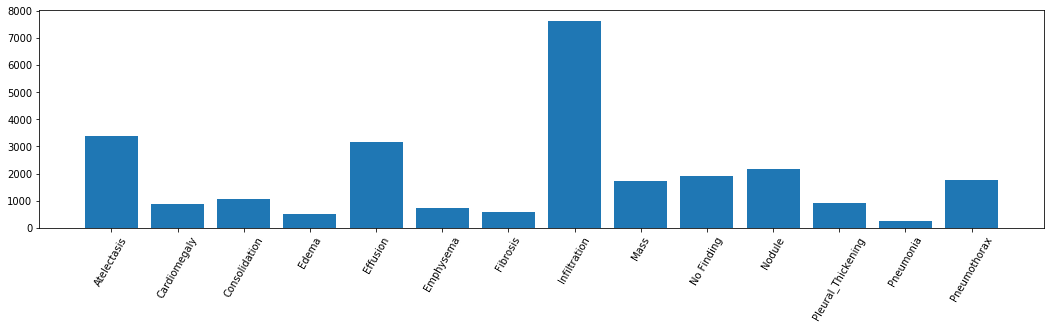

In [17]:
fig = plt.figure(figsize=(18, 4)) #sets a different size (inches wide, inches tall)

ax = plt.subplot(111)
ax.bar(range(0, len(distr_dict)), distr_dict.values())
ax.set_xticks(np.arange(0, len(distr_dict)))
ax.set_xticklabels(distr_dict.keys())

locs, labels = plt.xticks() #gets labels
plt.setp(labels, rotation=60) #sets rotation of the labels

plt.show()